IMPLEMENTACIJA METODA ZA ANALIZU SENTIMENTA NA DATASET "HOTEL REVIEWS"

In [9]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

Ovo je popis od 1000 hotela i njihovih recenzija koje pruža Datafinitijeva baza poslovnih podataka. Skup podataka uključuje lokaciju hotela, naziv, ocjenu, podatke o recenzijama, naslov, korisničko ime i još mnogo toga.

In [ ]:
pip install wordcloud

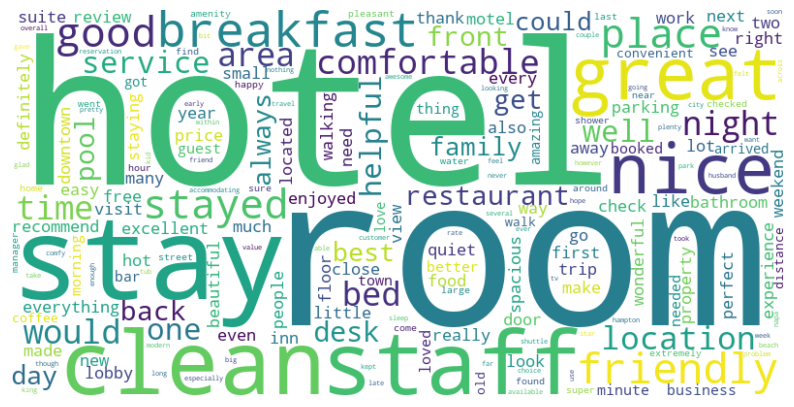

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'X_train_tfidf' is your TF-IDF matrix
tfidf_features = vectorizer.get_feature_names_out()

# Extract the feature names and their corresponding importance scores
features_importance = zip(tfidf_features, X_train_tfidf.sum(axis=0).tolist()[0])

# Create a dictionary with feature names and importance scores
features_dict = dict(features_importance)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(features_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dataset = pd.read_csv("C:\Users\majam\OneDrive\Radna površina\uui_projekt\Datafiniti_Hotel_Reviews.csv")

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

# Load the original dataset
original_data = pd.read_csv('C:\\Users\\majam\\OneDrive\\Radna površina\\uui_projekt\\Datafiniti_Hotel_Reviews.csv')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

# Select relevant columns
selected_columns = ['reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username']
selected_data = original_data[selected_columns]

# Drop rows with missing values in the selected columns
selected_data = selected_data.dropna(subset=selected_columns)

def preprocess_function(text):
    words = word_tokenize(str(text))
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalnum() and word.lower() not in stop_words]
    processed_text = ' '.join(words)
    return processed_text

# Preprocess text data (you may customize this preprocessing based on your needs)
selected_data['reviews.text'] = selected_data['reviews.text'].apply(preprocess_function)

# Save the preprocessed dataset to a new CSV file
selected_data.to_csv('preprocessed_data.csv', index=False)

# Display the first few rows of the preprocessed dataset
print(selected_data.head())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\majam\AppData\Roaming\nltk_data...


   reviews.rating                                 reviews.sourceURLs  \
3             2.0  https://www.tripadvisor.com/Hotel_Review-g4118...   
4             5.0  https://www.tripadvisor.com/Hotel_Review-g4118...   
5             5.0  https://www.tripadvisor.com/Hotel_Review-g4118...   
7             5.0  https://www.tripadvisor.com/Hotel_Review-g4118...   
8             5.0  https://www.tripadvisor.com/Hotel_Review-g4118...   

                                        reviews.text  \
3  currently bed writing past hr dog barking sque...   
4  live md aloft home away home stayed 1 night st...   
5  stayed family daughter wedding accommodating s...   
7  stayed visiting maryland live cute hotel great...   
8  travel lot job constantly staying hotel arrive...   

                              reviews.title reviews.userCity  \
3  Never again...beware, if you want sleep.         Richmond   
4                      ALWAYS GREAT STAY...           Laurel   
5                            Wonderful

## NAIVNI BAYES

1. Podjela skupa podataka:

     u skupove za treniranje i testiranje, koristeći alate poput train_test_split iz scikit-learn.

In [48]:
from sklearn.model_selection import train_test_split

# X će biti 'reviews.text', a y će biti 'reviews.rating'
X = selected_data['reviews.text']
y = selected_data['reviews.rating']

# podjela skupa u skupove za treniranje i testiraanje (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# sada su X_train i y_train podaci za treniranje, a X_test i y_test podaci za testiranje

In [49]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_text(selected_data):

    selected_data = re.sub(r'https?://\S+', '', selected_data)     # ukloni URL-ove
    
    tokens = word_tokenize(selected_data.lower())     # tokeniziraj tekst
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]     # ukloni "stop" riječi
    
    lemmatizer = WordNetLemmatizer() # lematizacija
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

selected_data['cleaned_reviews_text'] = selected_data['reviews.text'].apply(preprocess_text) # kreiraj novi stupac, gdje ću pohraniti pretprocesirane podatke

for index, row in selected_data.iterrows(): # ispisuje originalne i ociscene tekstove za prvih nekoliko redaka
    print(f"Original Text ({index}):")
    print(row['reviews.text'])
    print("\nCleaned Text:")
    print(row['cleaned_reviews_text'])
    print("\n" + "="*50 + "\n")
    
    if index == 2:     # prekida ispis nakon prvih tri redaka
        break

Original Text (3):
currently bed writing past hr dog barking squealing call front desk advise basically told nothing ca sleep

Cleaned Text:
currently bed writing past hr dog barking squealing call front desk advise basically told nothing ca sleep


Original Text (4):
live md aloft home away home stayed 1 night staff great especially olivia extra special remembered voice phone tell alert pay attention customer thumb

Cleaned Text:
live md aloft home away home stayed 1 night staff great especially olivia extra special remembered voice phone tell alert pay attention customer thumb


Original Text (5):
stayed family daughter wedding accommodating staff olivia excellent room well maintained would highly recommend hotel especially wedding venue celebration bay

Cleaned Text:
stayed family daughter wedding accommodating staff olivia excellent room well maintained would highly recommend hotel especially wedding venue celebration bay


Original Text (7):
stayed visiting maryland live cute hote

2.   Vektorizacija teksta:

Koristite tehniku vektorizacije TF-IDF (Term Frequency-Inverse Document Frequency) kako biste konvertirali tekstualne podatke u numerički format. Scikit-learn pruža TfidfVectorizer za tu svrhu.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = selected_data['cleaned_reviews_text'] 
y = selected_data['reviews.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # pdoejla skupa podataka na trening i test skupove (80% treniranje, 20% test)

vectorizer = TfidfVectorizer(max_features=5000)  # kreiranje TfidfVectorizer

X_train_tfidf = vectorizer.fit_transform(X_train) # prilagodba i transformacija trening podataka

X_test_tfidf = vectorizer.transform(X_test) # transofrmira test podatke koristeći isti vektorizer

3. Treniranje Naive Bayes klasifikatora:

 Treniranje Naivni Bayes klasifikatora, poput Multinomijalnog Naivnog Bayesa (MultinomialNB) dostupnog u scikit-learn biblioteci, koristeći skup za treniranje. 

(nb_classifier) se koristi za predviđanje ocjena za testni skup (X_test_tfidf). Ta predviđanja ocjena pohranjena su u varijablu "predictions".

4. Evaluacija modela:

Procjena performanse istreniranog modela na testnom skupu koristeći metrike poput točnosti, preciznosti, odziv i F1-ocjene.

accuracy_score izračunava točnost modela uspoređujući predviđene ocjene (predictions) s stvarnim ocjenama (y_test).

classification_report generira tekstualno izvješće koje prikazuje glavne metrike klasifikacije poput preciznosti, odziva i F1-ocjene za svaku klasu.

In [52]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

nb_predictions = nb_classifier.predict(X_test_tfidf) # predikcije na test setu

nb_accuracy = accuracy_score(y_test, nb_predictions) # evaluacija
nb_classification_report = classification_report(y_test, nb_predictions)

print("Naive Bayes točnost modela:", nb_accuracy)
print("Naive Bayes izvješće:\n", nb_classification_report)

Naive Bayes točnost modela: 0.5281954887218046
Naive Bayes izvješće:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.00      0.00      0.00        24
         3.0       0.00      0.00      0.00        66
         4.0       0.43      0.02      0.04       134
         5.0       0.53      1.00      0.69       279

    accuracy                           0.53       532
   macro avg       0.19      0.20      0.15       532
weighted avg       0.39      0.53      0.37       532



C:\Users\majam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\majam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\majam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471

5.   Predviđanja:

Koristi se obučeni (istrenirani) klasifikator Naivnog Bayesa za predviđanja na novim ili neviđenim podacima.

Ispisuje točnost modela i izvješće o klasifikaciji, koje pruža detaljne informacije o performansama modela za svaku klasu (ocjenu).

Ukratko, ove linije procjenjuju koliko dobro klasifikator Naivnog Bayesa generalizira na neviđene podatke (testni skup) i pruža detaljno izvješće o njegovim performansama, uključujući točnost i ostale metrike klasifikacije.

In [53]:
selected_data['cleaned_reviews_text'] = selected_data['reviews.text'].apply(preprocess_text)

X_new_tfidf = vectorizer.transform(selected_data['cleaned_reviews_text'])

new_predictions = nb_classifier.predict(X_new_tfidf) # izvršava predviđanja za nove podatke (buduće)

print("Predictions for the new data:", new_predictions)

Predictions for the new data: [5. 5. 5. ... 5. 4. 1.]


## METODA POTPORNIH VEKTORA

1. Podjela skupa podataka:

     u skupove za treniranje i testiranje, koristeći alate poput train_test_split iz scikit-learn.

In [37]:
X = selected_data['cleaned_reviews_text']
y = selected_data['reviews.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2.   Vektorizacija teksta:

Koristite tehniku vektorizacije TF-IDF (Term Frequency-Inverse Document Frequency) kako biste konvertirali tekstualne podatke u numerički format. Scikit-learn pruža TfidfVectorizer za tu svrhu.

In [39]:
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset

X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)


3. Treniranje SVM metode:

   Treniranje SVM modela, poput SVC (Support Vector Classification) u scikit-learn-u, koristeći train set.

In [40]:
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

SVC()

4.    Evaluacija modela:

Procjena performansi treniranog SVM modela na testnom skupu koristeći relevantne metrike.

In [56]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

print("Točnost Metode potpornih vektora", svm_accuracy)
print("Izvješće klasifikacije:\n", svm_classification_report)

Točnost Metode potpornih vektora 0.5620300751879699
Izvješće klasifikacije:
               precision    recall  f1-score   support

         1.0       0.67      0.14      0.23        29
         2.0       0.00      0.00      0.00        24
         3.0       0.00      0.00      0.00        66
         4.0       0.49      0.25      0.33       134
         5.0       0.57      0.94      0.71       279

    accuracy                           0.56       532
   macro avg       0.35      0.27      0.25       532
weighted avg       0.46      0.56      0.47       532



C:\Users\majam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\majam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\majam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471

5.    Predviđanja:

Koristite trenirani SVM model za donošenje predviđanja na novim ili nepoznatim (budućim) podacima.

In [44]:
svm_predictions = svm_classifier.predict(X_test_tfidf)

#### KLASIFIKACIJA "reviews_text" i "reviews_title" U POZITIVNO, NEGATIVNO ILI NEUTRALNO

In [54]:
file_path = r"C:\Users\majam\OneDrive\Radna površina\uui_projekt\preprocessed_data.csv" # učita .csv datoteku
df = pd.read_csv(file_path)

sia = SentimentIntensityAnalyzer() # inicijaliziranje VADER analizator sentimenta

def classify_sentiment(text): # definiranje funkcije za klasifikaciju sentimenta

    compound_score = sia.polarity_scores(text)['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['reviews.text'].apply(classify_sentiment) # klasificiranje sentimenta za svaki komentar

print(df[['reviews.text', 'sentiment']]) # rezultati

                                           reviews.text sentiment
0     currently bed writing past hr dog barking sque...   neutral
1     live md aloft home away home stayed 1 night st...  positive
2     stayed family daughter wedding accommodating s...  positive
3     stayed visiting maryland live cute hotel great...  positive
4     travel lot job constantly staying hotel arrive...  positive
...                                                 ...       ...
2652  staying 4 year visit son attends boise state a...  positive
2653  hard review oceanfront hotel go ocean necessar...  positive
2654  live close needed stay somewhere night due ren...  positive
2655  rolled laid head woke continental breakfast ro...  positive
2656  filthy outdated noisy neighbour worst nearly e...  negative

[2657 rows x 2 columns]


In [55]:
file_path = r"C:\Users\majam\OneDrive\Radna površina\uui_projekt\preprocessed_data.csv" # učitava .csv datoteku

df = pd.read_csv(file_path)

sia = SentimentIntensityAnalyzer() # VADER sentiment analyzer

def classify_sentiment(text): # definira funkciju za klasifikaciju sentimenta 
    compound_score = sia.polarity_scores(text)['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_reviews'] = df['reviews.text'].apply(classify_sentiment)

df['sentiment_title'] = df['reviews.title'].apply(classify_sentiment)

print(df[['reviews.text', 'sentiment_reviews', 'reviews.title', 'sentiment_title']])

                                           reviews.text sentiment_reviews  \
0     currently bed writing past hr dog barking sque...           neutral   
1     live md aloft home away home stayed 1 night st...          positive   
2     stayed family daughter wedding accommodating s...          positive   
3     stayed visiting maryland live cute hotel great...          positive   
4     travel lot job constantly staying hotel arrive...          positive   
...                                                 ...               ...   
2652  staying 4 year visit son attends boise state a...          positive   
2653  hard review oceanfront hotel go ocean necessar...          positive   
2654  live close needed stay somewhere night due ren...          positive   
2655  rolled laid head woke continental breakfast ro...          positive   
2656  filthy outdated noisy neighbour worst nearly e...          negative   

                                 reviews.title sentiment_title  
0     Neve